In [4]:
from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import torch

2022-10-11 15:49:43.993912: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-11 15:49:44.329014: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-11 15:49:44.329053: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-11 15:49:44.381852: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-11 15:49:45.931148: W tensorflow/stream_executor/platform/de

In [36]:
penguins = tfds.load("penguins", split='train')
penguins = penguins.batch(500).get_single_element()
X, y = penguins['features'], penguins['species']
X, y = X.numpy(), y.numpy()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [40]:
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

In [93]:
def init(): 
    W = torch.randn(4, 3, requires_grad=True)
    b = torch.randn((3,), requires_grad=True)
    return W, b

def log_reg(X, W, b):
    return torch.softmax(X@W + b, 1)
 
def cross_entropy(y_true, y_pred):
    # y_pred = matrix ---> arange return vect, range(0, dim(real_y))
    #                      y_true = 0, 1, 2 ---> used as index
    return -y_pred[torch.arange(0, y_true.shape[0]), y_true].log().mean()

def accuracy(y_true, y_pred):
    return (y_pred.argmax(-1)==y_true).float().mean()

In [94]:
W, b = init()
y_pred = log_reg(X_train, W, b)
cross_entropy(y_train, y_pred)
accuracy(y_train, y_pred)

tensor(0.3400)

### Prediction and Optimization

In [99]:
W, b = init()
lr = 0.001
accuracies = []
losses = []

for i in range(10000):
    
    y_pred = log_reg(X_train, W, b)
    loss = cross_entropy(y_train, y_pred)
    loss.backward()
    with torch.no_grad(): 
        
        W -= lr*W.grad
        b -= lr*b.grad
        
    W.grad.zero_()
    b.grad.zero_()
    
    losses.append(loss.data)
    accuracies.append(accuracy(y_train, y_pred))
    

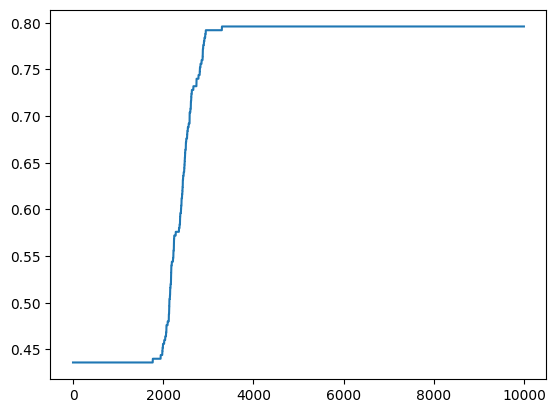

In [100]:
plt.plot(accuracies)

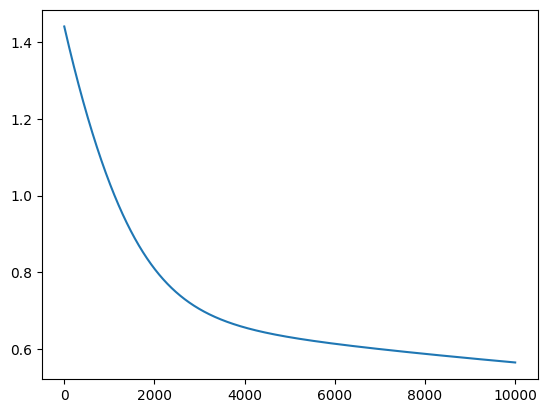

In [101]:
plt.plot(losses)